# Analysis of UCSD Parking Occupancy and Local Traffic Collisions

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Haoyu Fu
- Qianxia Hui
- Arianna Morris
- Michael Tang
- Bofu Zou

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

Does parking occupancy on UCSD's campus predict traffic incidents on major roads near UCSD's campus?

## Background and Prior Work

Traffic incidents are always a significant concern in modern cities, especially in densely populated areas. As a large institution with a growing population, the University of California, San Diego (UCSD) campus tackles the problems brought by heavy vehicular traffic and parking. As the campus community grows, the parking occupancy rates may reflect the number of traffic incidents happening around the campus area. Our study seeks to find out whether there’s a correlation between the UCSD campus parking occupancy rates and the traffic incidents happening surrounding campus. 

While our topic is mainly focused on how parking occupancy may predict the occurrence of traffic collisions within the area of UCSD, there have been prior studies that analyze the likelihood of car accidents occurring in a given geographic region. For example, Forbes Advisor compiled a list of the top 50 U.S. cities with the highest likelihood of getting into a car accident, with San Diego being one of them.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) This ranking system was determined by data for fatality rate per 100,000 people from the National Highway Transportation Safety Administration and average years between collisions and relative collision likelihood from the AllState Best Drivers Index. This data analysis only focuses on urban cities, which means the dataset is relatively small as only the 50 largest cities by population from census data were chosen. A general understanding of a particular city's collision danger is approximated by comparison to other major cities in the dataset. Forbes Advisor’s primary goal is providing financial advice, which this data analysis does by offering relevant information about collisions that may involve insurance, lawyer/attorney, and risk assessment situations. 

Another study investigated the causal relationship between road density and parking occupancy.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Tunisian researchers conducted a research paper to investigate the causal relationship between road density and parking occupancy in Tunis city center using Granger causality tests based on vector error correction modeling. The authors collected data using video cameras around a major street in the capital of Tunis, and found that there does exist a causal relationship between road density and parking occupancy, with road density Granger-causing parking occupancy. This suggests that increasing road density may lead to an increase in parking occupancy, which in turn may lead to an increase in road congestion. The authors suggest that their findings can be used to develop more sustainable parking policies that reduce road congestion and can be incorporated into parking models to improve their accuracy and effectiveness. This study provides important insights into the relationship between road density and parking occupancy, and gives us some ideas for our own project since road density and traffic incidents are two significant features of a city’s traffic conditions.

Similarly, we want to assess what the general level of safety associated with traffic collisions might be through exploring a more confined geographical area that is of interest to us, UCSD. Based upon these prior works and the UCSD campus parking occupancy and nearby traffic incidence data, our project aims to identify patterns specific to UCSD campus and its surrounding areas. We will conduct a descriptive and exploratory data analysis of these datasets, which will allow us to identify important features of the datasets and how they may relate to one another. We aim to contribute to the existing literature on road safety and how it impacts us on the UCSD campus. 

**References:**

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Christy Bieber, J. D. (2023, October 25). The cities where you’re most likely to get in a car accident. Forbes. https://www.forbes.com/advisor/legal/auto-accident/cities-most-car-accidents/  
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Hassine, S. B., Kooli, E., & Mraihi, R. (2022). The causal relationship between road density and parking occupancy. World Journal of Advanced Research and Reviews, 15(3), 125–134. https://wjarr.com/sites/default/files/WJARR-2022-0896.pdf


# Hypothesis


We hypothesize that there will be a positive correlation between the number of cars parked on campus and the amount of traffic incidents occurring on and around the UCSD campus. We believe this because more congestion within the campus area could lead to more traffic incidents occurring.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Survey of Parking Space Occupancy Levels
  - Link to the dataset: https://rmp-wapps.ucsd.edu/TS/Survey/Survey%20of%20Parking%20Space%20Occupancy%20Levels/Quarterly%20Tables/Contents.html 
  - Number of observations: 93 (quarterly tables)
  - Number of variables: 15 ("University-Wide" data)

There are a total 93 observations in this dataset, with each consisting of the parking occupancy levels of UCSD parking lots of a given quarter at UCSD, from Summer 2000 to Summer 2023. However, we only plan to utilize 29 of the observations, from Summer 2016 to Summer 2023, to stay consistent with the data we have in Dataset #2. We started by scraping the dataset link for the 29 observations we wanted, and combined those 29 observations into one csv file (QbyQ UCSD Parking Occupancy.csv) to make our data analysis easier. For each row (observation) in our csv file, we have 15 columns (variables) which covers information including parking spaces in total, empty parking spaces listed in hourly time, and occupancy proportion at peak time (important feature that could be utilized along with another dataset). The variables all have the same datatype: numerical variables. After creating our own csv file from the weblink, we have a dataset we integrated ourselves, so we didn't need to do much data cleaning. Since we weren't interested in the columns that display parking occupancy in hourly time, we dropped those columns from the dataset.

- Dataset #2
  - Dataset Name: Traffic collisions details (2015 through year-to-date)
  - Link to the dataset: https://data.sandiego.gov/datasets/police-collisions-details/
  - Number of observations: 123,708
  - Number of variables: 22

This dataset encompasses traffic collision details in the San Diego area (including the vicinity of UCSD) from 2015 to the present, with a total of 123,708 observations and 22 variables. The important variables in the dataset include time stamp of the collision, location details, violation type,  number of injuries and fatalities. The data types include categorical variables (violation type), numerical variables (number of injuries and fatalities), and time variables. The dataset can serve as a proxy for understanding traffic conditions and traffic safety in the area. We needed to clean the dataset by filtering location (street names) in the dataset to find collisions that happen on the major streets in UCSD surrounding area. Then we handled missing values, converting data type, and removing irrelevant variables. Additionally, we transformed the ISO 8601 formatted dates into dates that fit into our quarter-by-quarter analysis according to UCSD's quarter dates for the 2016-2023 school years. We then dropped the date_time columns and added our own column with the quarter-formatted dates. We also had to drop rows containing data for the Fall 2023 quarter, as it is still ongoing and it wouldn't make sense to make an analysis on this data.

## Dataset #1: Quarter by Quarter UCSD Parking Occupancy Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
## Import csv file with parking data
parking_data = pd.read_csv('QbyQ UCSD Parking Occupancy.csv', 
                            usecols = ['Quarter', 'Year', 'Parking Spaces', 
                                    'Empty Spaces', 'Occupied Spaces', '% Occupied'])

## Rename the column names
parking_data = parking_data.rename(columns={'Quarter':'quarter', 'Year':'year', 
                     'Parking Spaces':'parking_spaces', 'Empty Spaces':'empty_spaces', 
                     'Occupied Spaces':'occupied_spaces', '% Occupied':'percent_occupied'})
parking_data

,quarter,year,parking_spaces,empty_spaces,occupied_spaces,percent_occupied
0,Summer,2016,19297,6567,12730,65.97%
1,Fall,2016,19245,3578,15667,81.41%
2,Winter,2017,18316,2691,15625,85.31%
3,Spring,2017,18334,3096,15238,83.11%
4,Summer,2017,18082,5050,13032,72.07%
5,Fall,2017,18011,2313,15698,87.16%
6,Winter,2018,18105,2385,15720,86.83%
7,Spring,2018,18092,2504,15588,86.16%
8,Summer,2018,17107,4466,12641,74.00%
9,Fall,2018,17408,3052,14356,82.47%


## Dataset #2: San Diego PD Traffic Collision Details Dataset

In [3]:
## Import csv file with collision data
collision_data = pd.read_csv('https://seshat.datasd.org/traffic_collision_details/pd_collisions_details_datasd.csv', usecols = ['date_time', 'address_road_primary', 'injured', 'killed'], parse_dates = ['date_time'])
collision_data.head()

,date_time,address_road_primary,injured,killed
0,2015-01-14 20:00:00,JUNIPER,0,0
1,2015-03-19 12:00:00,LINDA VISTA,0,0
2,2015-03-24 03:05:00,WASHINGTON,2,0
3,2015-03-27 23:56:00,WORDEN,1,0
4,2015-07-06 11:45:00,EL CAJON,0,0


In [4]:
## Filter datasset to include only relevant street names for analysis
collision_data['address_road_primary'] = collision_data['address_road_primary'].apply(lambda x: str.lower(str(x)))
street_names = ['genesee', 'gilman', 'hopkins', 'la jolla farms', 
                'la jolla scenic', 'la jolla scenic dr north', 
                'la jolla scenic n', 'la jolla village', 'lebon', 
                'nobel', 'north torrey pines', 'regents', 
                'villa la jolla', 'voigt']
collision_data = collision_data[collision_data['address_road_primary'].isin(street_names)]
collision_data

,date_time,address_road_primary,injured,killed
50,2016-07-06 00:01:00,la jolla village,0,0
87,2016-07-29 15:27:00,genesee,0,0
88,2016-07-29 15:27:00,genesee,0,0
134,2016-08-05 07:30:00,nobel,1,0
149,2016-08-06 20:39:00,nobel,1,0
...,...,...,...,...
125303,2022-08-06 18:47:00,genesee,1,0
125348,2023-01-13 20:56:00,regents,0,0
125351,2023-01-22 12:19:00,genesee,1,0
125435,2023-10-28 23:18:00,genesee,0,0


In [5]:
# Extract the year for collision_data
collision_data['date_time'] = pd.to_datetime(collision_data['date_time'])
collision_data["year"] = collision_data['date_time'].dt.year
collision_data.dtypes

# Extract the quarter time from UCSD_Quarter_Dates
quarter_dates = pd.read_csv("UCSD_Quarter_Dates.csv")
quarter_dates["Start_date"] = pd.to_datetime(quarter_dates['Start'])
quarter_dates["End_date"] = pd.to_datetime(quarter_dates['End'])

def quarter_check(date):
    for row in quarter_dates.values:
        if date >= row[3] and date <= row[4] + pd.Timedelta(days=1):
            return row[0]
    return None

# Extract the quarter for collision_data
collision_data["quarter"] = collision_data["date_time"].apply(quarter_check)
collision_data = collision_data.dropna(subset=["quarter"])
collision_data = collision_data[["year", "quarter", "address_road_primary", "injured", "killed"]]
collision_data = collision_data.drop(collision_data[(collision_data['quarter'] == 'Fall') & (collision_data['year'] == 2023)].index)

collision_data

,year,quarter,address_road_primary,injured,killed
50,2016,Summer,la jolla village,0,0
87,2016,Summer,genesee,0,0
88,2016,Summer,genesee,0,0
134,2016,Summer,nobel,1,0
149,2016,Summer,nobel,1,0
...,...,...,...,...,...
125186,2021,Fall,nobel,1,0
125200,2021,Fall,regents,1,0
125303,2022,Summer,genesee,1,0
125348,2023,Winter,regents,0,0


# Results

## Exploratory Data Analysis

#### First we will conduct an analysis of the datasets seperately to obtain a greater understanding of their contents, then we will analyze them together. 

### Dataset 1: `percent_occupied` parking spaces per `quarter`

We will generate summary statistics regarding percentage of occupied spots by quarter and year on the UCSD campus. This will help us to first understand the basics of our data.

In [6]:
# remove percentage signs from column 
parking_data['percent_occupied'] = parking_data['percent_occupied'].str.replace('%', '')

# convert to float values
parking_data['percent_occupied'] = pd.to_numeric(parking_data['percent_occupied'])

In [7]:
parking_data['percent_occupied'].describe()

count    29.000000
mean     73.096207
std      13.601178
min      39.410000
25%      65.970000
50%      79.000000
75%      83.110000
max      90.610000
Name: percent_occupied, dtype: float64

Based upon these statistics, we can see that we have data for 29 quarters, wherein the average parking occupancy falls at 73%. The minimum value for parking occupancy is 39% occupied, and the maximum is 90%. Next, we will generate a barplot that will allow us to visualize any outliers in the data, or any trends within the data that we may not see within the summary statistics. 

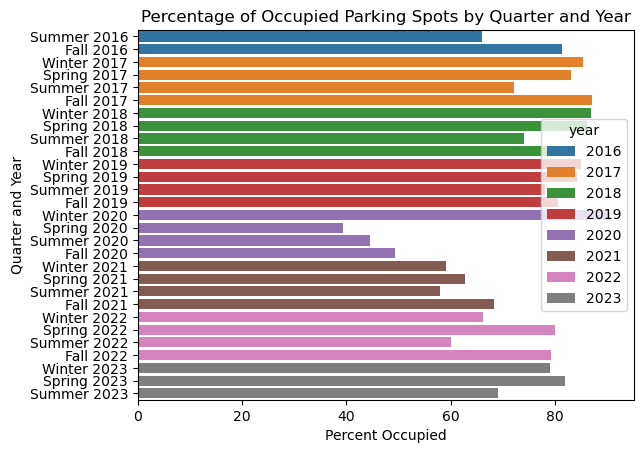

In [8]:
# make copy of DF
occupied = parking_data.copy()

# concat quarter and year columns 
occupied['quarter_year'] = occupied['quarter'].str.cat(occupied['year'].astype(str), sep = ' ')

# create plot w labels using dodge to set hue of bars to year without adjusting bar width
sns.barplot(data=occupied, x='percent_occupied', y='quarter_year', hue='year', dodge=False)
plt.title('Percentage of Occupied Parking Spots by Quarter and Year')
plt.xlabel('Percent Occupied')
plt.ylabel('Quarter and Year')
plt.show()

We can see based upon this figure that while parking occupancy remains relatively stable between 60%-80% occupied in accordance with the mean value of 73% occupied, in the spring 2020 quarter, there begins a significant dip in occupancy, where our minimum value (39% occupancy) occurs. This is likely due to the switch to online learning that occured during this time. As on campus activities resume, parking occupancy slowly returns to values between 60%-80% again. 

### Dataset 1: `percent_occupied` and `parking_spaces` per `quarter` (grouped)

In order to understand the potential relationship between the percent of occupied parking spaces and the total number of available parking spaces on campus, we will generate a boxplot that shows the values of each, averaged over each quarter from 2016-2023. 

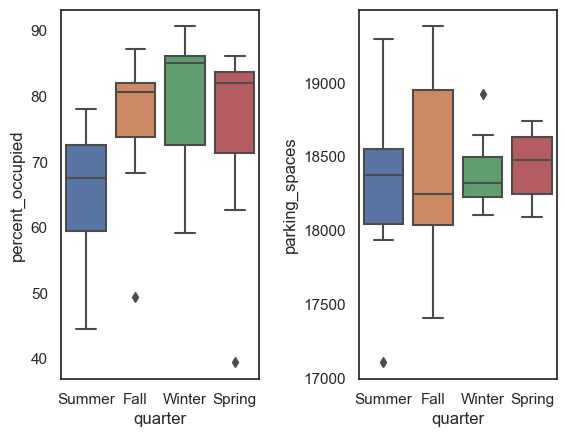

In [9]:
parking_data['parking_spaces'] = parking_data['parking_spaces'].astype('int')
sns.set(font_scale=1, style="white")
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.5)
sns.boxplot(ax=ax[0], data=parking_data, x='quarter', y='percent_occupied')
sns.boxplot(ax=ax[1], data=parking_data, x='quarter', y='parking_spaces');

We notice that summer quarter has the lowest percentage occupied for parking. It appears highest in the Winter and lowest in the Summer, suggesting a seasonal effect on parking space occupancy. 
There are two outliers, one in Fall and the other in Spring quarter due to campus close.  

### Dataset 2: Number of collisions in `collision_data` per `quarter`

First, we check how many accidents occurred each quarter using ```groupby```.

In [10]:
collision_data.groupby(['quarter', 'year']).size().reset_index(name='Count')

collision_data.head()

,year,quarter,address_road_primary,injured,killed
50,2016,Summer,la jolla village,0,0
87,2016,Summer,genesee,0,0
88,2016,Summer,genesee,0,0
134,2016,Summer,nobel,1,0
149,2016,Summer,nobel,1,0


In [11]:
min = collision_data.groupby(['quarter', 'year']).size().min()
median = collision_data.groupby(['quarter', 'year']).size().median()
max = collision_data.groupby(['quarter', 'year']).size().max()
min, median, max

(54, 101.0, 175)

We can find that the minimum number of accidents is 54, the median number of accidents is 101, and the maximum number of accidents is 175 (all per quarter).

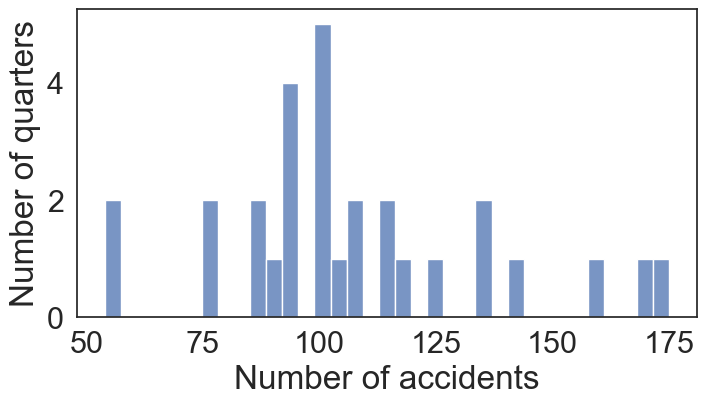

In [12]:
sns.set(font_scale=2, style="white")

plt.figure(figsize=(8, 4))
sns.histplot(data = collision_data, x = collision_data.groupby(['quarter', 'year']).size(), bins = 35)
plt.ylabel('Number of quarters')  
plt.xlabel('Number of accidents')
plt.show()

The collision data that we grouped can be plotted in a histogram to see a general range of the total number of accidents that occur in a quarter. This helps us visualize that the minimum number of accidents is roughly 50, and the maximum number of accidents is roughly 175. There aren't any extreme outliers in the data, as the data is relatively normally distributed with a slight left skew.

### Dataset 2: Number of collisions in `collision_data` per `address_road_primary`


Within dataset 2, the street name on which the collision occurred is stored in the column titled `address_road_primary`. Thus, we will count the number of collisions that occur on each street.

In [13]:
collision_data.groupby(["address_road_primary"]).size().reset_index(name='Count')

,address_road_primary,Count
0,genesee,1346
1,gilman,116
2,hopkins,16
3,la jolla farms,11
4,la jolla scenic,34
5,la jolla scenic dr north,2
6,la jolla scenic n,7
7,la jolla village,616
8,lebon,67
9,nobel,282


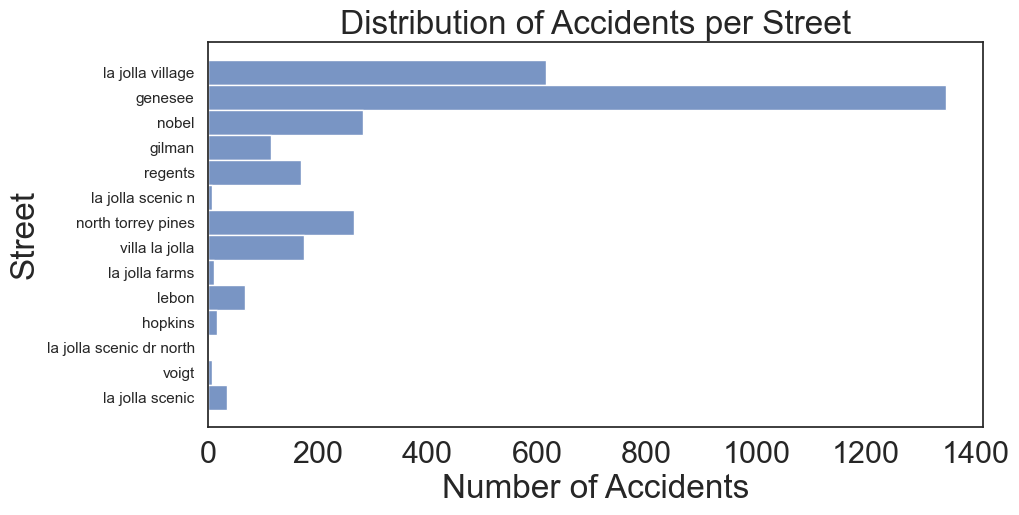

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data= collision_data, y='address_road_primary', bins=30)

plt.ylabel('Street')
plt.xlabel('Number of Accidents')
plt.title('Distribution of Accidents per Street')
plt.tick_params(axis='y', labelsize=11)
plt.show()

The graph displays number of accidents per street. Most of the streets have the number below 400. It is worth to notice that la jolla village and genesee street have the number over 600, which are perceived as outliers. However, this is due to the fact that these two streets are the longer than the other streets, which leads to more observations. Therefore, we do not consider them as outliers.

### Dataset 2: `injured` and `killed` in `collision_data` per `quarter`

First, we use ```groupby``` to find the sum and mean number of injured/killed per quarter:

In [15]:
casualties = collision_data.copy()
casualties = casualties.assign(quarter_year=casualties['year'].astype('str')
                               + '_'
                               + casualties['quarter']
                               ).drop(columns=['quarter','year'])
casualties_gb = casualties.groupby('quarter_year').agg({
                'injured':[('injured_sum','sum'),('injured_mean','mean')],
                'killed':[('killed_sum','sum'),('killed_mean','mean')]})
casualties_gb.columns = ['injured_sum','injured_mean','killed_sum','killed_mean']
casualties_gb = casualties_gb.reset_index()
casualties_gb.head()

,quarter_year,injured_sum,injured_mean,killed_sum,killed_mean
0,2016_Fall,128,1.015873,0,0.000000
1,2016_Summer,48,0.857143,2,0.035714
2,2017_Fall,128,0.955224,2,0.014925
3,2017_Spring,89,0.936842,0,0.000000
4,2017_Summer,53,0.602273,0,0.000000


Then we draw the distributions of each statistics per quarter:

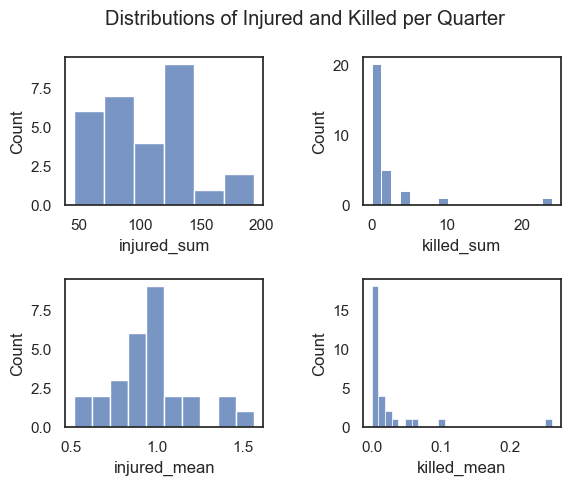

In [16]:
sns.set(font_scale=1, style="white")
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('Distributions of Injured and Killed per Quarter')
sns.histplot(ax=ax[0][0], data=casualties_gb, x='injured_sum')
sns.histplot(ax=ax[0][1], data=casualties_gb, x='killed_sum')
sns.histplot(ax=ax[1][0], data=casualties_gb, x='injured_mean')
sns.histplot(ax=ax[1][1], data=casualties_gb, x='killed_mean');

We can see that the total injured per quarter ranges from 50 to 200 across different quarters, and the mean injured per collision per quarter is somewhat normally distributed with mean around 1. 

For the total killed per quarter, we can see that the distribution is very skewed. There are two outliers indicating some large numbers of killed in collisions within a single quarter. And the distribution of the mean killed per collision per quarter shows that these two outliers are not because there are many collisions happened in that quarter, but due to one (or a few) severe collisions.

## Combined Data Analysis

Now, we will analyze the datasets as a combined dataset in order to understand any potential relationships between them. 

### `count_collisions` vs `percent_occupied` by `quarter` and `year`

We merge the total number of collisions (`count_collisions`) and occupied parking percentage (`percent_occupied`) together into a new dataframe called `parking_collision`.

We first select the relevant columns ('quarter', 'year', 'percent_occupied') from the 'parking_data' dataframe. Next, we group the `collision_data` dataframe by 'year' and 'quarter', counts the number of incidents resulting in a dataframe named `parking_collision`.
Finally, the code merges the `parking_collision` and `parking_percent` dataframes on 'year' and 'quarter' using a left join and displays the first few rows of the merged dataframe.

In [17]:
parking_percent = parking_data[['quarter','year','percent_occupied']]
parking_collision = collision_data.groupby(['year','quarter']).count().reset_index().drop(['injured','killed'],axis=1)
parking_collision = parking_collision.rename({'address_road_primary':'count_collisions'},axis=1)
parking_collision = pd.merge(left=parking_collision,right=parking_percent,on=['year','quarter'],how='left')
parking_collision.head()

,year,quarter,count_collisions,percent_occupied
0,2016,Fall,126,81.41
1,2016,Summer,56,65.97
2,2017,Fall,134,87.16
3,2017,Spring,95,83.11
4,2017,Summer,88,72.07


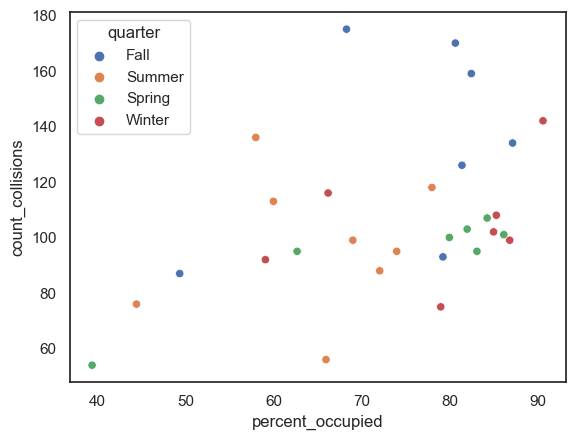

In [18]:
sns.scatterplot(data=parking_collision, x='percent_occupied', y='count_collisions',hue='quarter');

The scatter plot uses different colors (hue) to distinguish between different quarters ('Fall', 'Summer', etc.). Each point on the scatter plot represents a specific combination of parking occupancy and the number of collisions for a particular quarter and year.

In this case, it appears that higher parking occupancy is associated with more traffic incidents during different quarters and years.

### Lineplot: `count_collisions` & `percent_occupied` by quarter and year

In [19]:
# Define a function quarter_num to map quarter names to numerical values
def quarter_num(s):
    if s=='Fall': return 4
    if s=='Winter': return 1
    if s=='Spring': return 2
    if s=='Summer': return 3

In [20]:
parking_percent = parking_data[['quarter','year','percent_occupied']]

# Group collision_data by year and quarter, count the number of incidents
parking_collision = collision_data.groupby(['year','quarter']).count().reset_index().drop(['injured','killed'],axis=1)
parking_collision = parking_collision.rename({'address_road_primary':'count_collisions'},axis=1)

# Merge the 'df' and 'parking_percent' dataframes on year and quarter using a left join
parking_collision = pd.merge(left=parking_collision,right=parking_percent,on=['year','quarter'],how='left')

# Apply the quarter_num function to map quarter names to numerical values
parking_collision['quarter'] = parking_collision['quarter'].apply(quarter_num)

# Sort the dataframe by year and quarter
parking_collision = parking_collision.sort_values(['year','quarter'])

# Create a new column 'time'
parking_collision['time'] = parking_collision['year'].astype(str) +'_'+ parking_collision['quarter'].astype(str)

parking_collision.head()

,year,quarter,count_collisions,percent_occupied,time
1,2016,3,56,65.97,2016_3
0,2016,4,126,81.41,2016_4
5,2017,1,108,85.31,2017_1
3,2017,2,95,83.11,2017_2
4,2017,3,88,72.07,2017_3


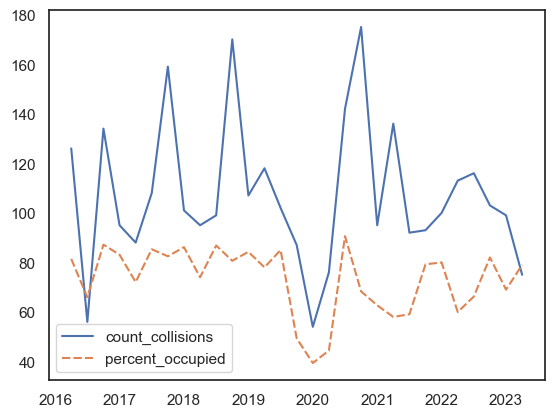

In [21]:
plt.xticks(np.arange(-1,31,step=4), np.arange(2016,2024))
sns.lineplot(data=parking_collision[['time','count_collisions','percent_occupied']]);

The lineplot shows how total number of collisions and percentage of parking occupancy changes over time from 2016 to 2023.

From the lineplot, we can see that generally the higher percentage of parking occupancy, the more number of collisions.

From our scatterplot, we can see a relative linear relationship between the total number of collisions and percentage of parking occupancy. We can use linear regression to further explore if parking occupancy predicts the number of collisions.

In [22]:
outcome_1, predictors_1 = patsy.dmatrices('count_collisions ~ percent_occupied', parking_collision)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:       count_collisions   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     5.094
Date:                Wed, 06 Dec 2023   Prob (F-statistic):             0.0323
Time:                        12:29:19   Log-Likelihood:                -136.03
No. Observations:                  29   AIC:                             276.1
Df Residuals:                      27   BIC:                             278.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           44.7612     28.205  


Looking at the coefficients, for every one percent increase in parking occupancy, we expect to see about a 0.86 unit increase in the number of traffic collisions. 
Since the p-value for `percent_occupied` is less than 0.05, `percent_occupied` may be a statisically significant predictor for `count_collisions`.


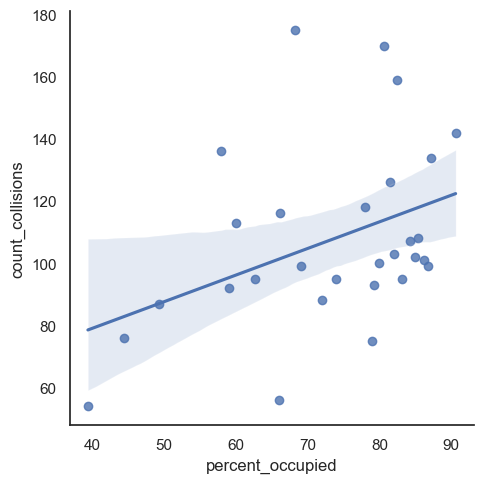

In [23]:
sns.lmplot(data=parking_collision, x='percent_occupied', y='count_collisions');


The regression line represented by the data indicates there is a slightly positive relationship between parking occupancy levels and the number of collisions.


### `median_collisions` by `quarter` only

In [24]:
parking_percent = parking_data[['quarter','percent_occupied']].groupby('quarter').median()
parking_collision = collision_data.groupby(['year','quarter']).count().reset_index().drop(['year','injured','killed'],axis=1)
parking_collision = parking_collision.groupby('quarter').median().reset_index()
parking_collision = parking_collision.rename({'address_road_primary':'median_collisions'},axis=1)
parking_collision = pd.merge(left=parking_collision,right=parking_percent,on=['quarter'],how='left')
parking_collision

,quarter,median_collisions,percent_occupied
0,Fall,134.0,80.660
1,Spring,100.0,82.000
2,Summer,97.0,67.495
3,Winter,102.0,85.000


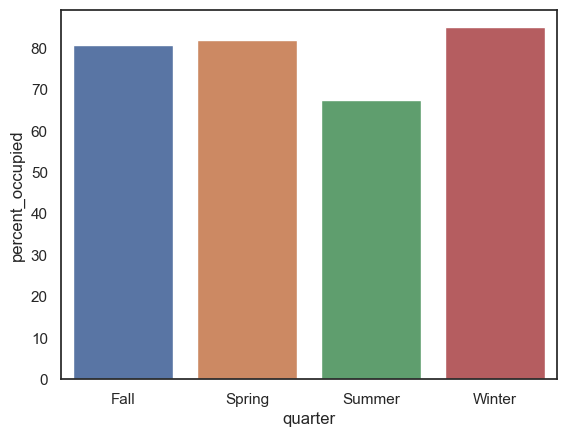

In [25]:
sns.barplot(data=parking_collision, x='quarter', y='percent_occupied');

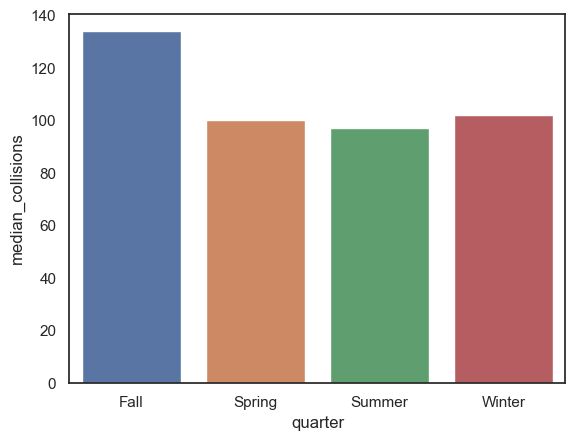

In [26]:
sns.barplot(data=parking_collision, x='quarter', y='median_collisions');

To determine if there is a significant relationship between `percent_occupied` and `median_collisions`, we will conduct a t-test. First, we must determine what kind of t-test is appropriate for our data. To do this, we will look at their variance. 

In [27]:
print(np.var(parking_collision['percent_occupied']))
print(np.var(parking_collision['median_collisions']))

44.98552968749998
224.1875


Because the variance of `percent_occupied` is less than `median_collisions` by a factor of greater than 4, we will utilize a Welch's t-test.

In [28]:
stats.ttest_ind(parking_collision['percent_occupied'], parking_collision['median_collisions'], equal_var= False)

Ttest_indResult(statistic=-3.110255203895711, pvalue=0.03403808035237772)

The Welch's t-test returns a p-value of 0.03, which suggests that the relationship between `percent_occupied` and `median_collisions` is statistically significant. 

### scatterplot of `median_collisions` and `percent_occupied` by `quarter`

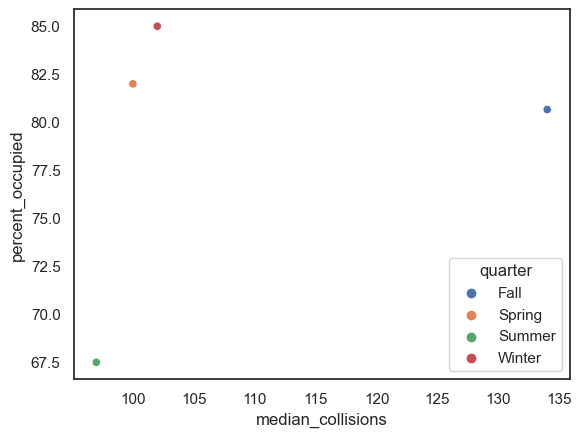

In [29]:
sns.scatterplot(data=parking_collision, x='median_collisions', y='percent_occupied', hue='quarter');

### Barplot `median_collisions` by `year` only

In [30]:
parking_percent = parking_data[['year','percent_occupied']].groupby('year').median()
parking_collision = collision_data.groupby(['year','quarter']).count().reset_index().drop(['quarter','injured','killed'],axis=1)
parking_collision = parking_collision.groupby('year').median().reset_index()
parking_collision = parking_collision.rename({'address_road_primary':'median_collisions'},axis=1)
parking_collision = pd.merge(left=parking_collision,right=parking_percent,on=['year'],how='left')
parking_collision

,year,median_collisions,percent_occupied
0,2016,91.0,73.690
1,2017,101.5,84.210
2,2018,100.0,84.315
3,2019,112.5,82.465
4,2020,81.5,46.905
5,2021,115.5,60.890
6,2022,106.5,72.730
7,2023,99.0,79.000


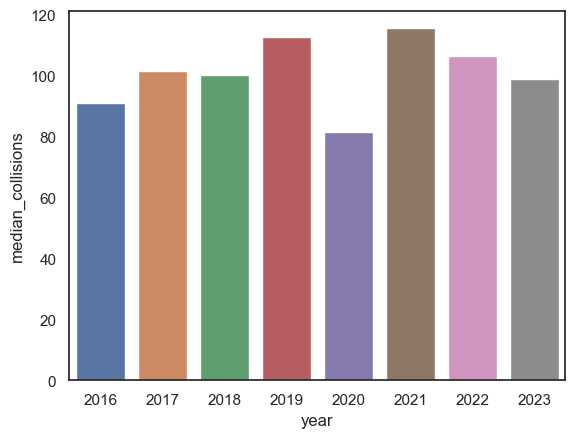

In [31]:
sns.barplot(data=parking_collision, x='year', y='median_collisions');

# Ethics & Privacy

Our proposed project involves the analysis of data related to parking occupancy on the UCSD campus and traffic incidents on nearby major roads. As we conduct our analysis, we are aware of the importance of ethical standards and privacy concerns. [Deon’s ethics checklist](https://deon.drivendata.org/#data-science-ethics-checklist) provides a useful framework for investigating potential ethics or privacy issues. 

In order to avoid potential bias within our datasets, we are only utilizing datasets that are public domain and published by reputable sources. For instance, our proposed dataset providing accident information is published by the San Diego government, and our proposed dataset with UCSD parking data is published by UCSD campus authorities. The traffic incident information is not directly collected from individuals, but instead published to public domain at the time of the accident when collected. We acknowledge that some information available in the dataset may be sensitive, though not personally identifying information (PII), and we are excluding this information from our analysis. The parking occupancy data is collected by [“cameras embedded with artificial intelligence”](https://today.ucsd.edu/story/parking-on-campus-theres-an-app-for-that#:~:text=IT%20Services%20enlisted%20student%20developers,which%20parking%20spaces%20are%20available). The parking occupancy data does not collect PII, and no PII information is published with the dataset. 

We acknowledge that there may be unintended consequences as a result of our data analysis. While inferences may be extracted from our conclusions, our data analysis does not aim to make a generalization about the safety of the roads surrounding UCSD. Our analysis intends to be informative about one facet that may contribute to road safety. Correlation does not elude causation, thus, we are simply exploring potential correlation between our datasets. Furthermore, confounds may be present within our data analysis. Relationships between holidays/events and parking/collisions may be present, which could influence our data analysis. Since the data from our first dataset is grouped by each academic quarter of UCSD, there may be outlier data points that we cannot account for because the data has been generalized to a period of roughly three months, and we cannot see any variations that month-to-month events might present. Lastly, our intent is not to influence drivers to shift their driving habits, but instead, to provide insight into potential relationships between driving habits. 

We aim to be transparent in our methodology, and will provide a summary and details of the steps we complete in our analysis, as well as any concerns that may arise throughout our process. Our project's primary goal is to contribute positively to public safety and traffic efficiency while minimizing any potential harm.

# Discussion and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.

- Haoyu Fu
- Qianxia Hui
- Arianna Morris
- Michael Tang
- Bofu Zou